Import libraries

Taken from website:-
https://ourworldindata.org/coronavirus-source-data

In [ ]:
import pandas as pd
import numpy as np

Read files

In [ ]:
# load datasets
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91019,ZWE,Africa,Zimbabwe,2021-05-20,38635.0,23.0,20.571,1585.0,2.0,0.429,2599.421,1.547,1.384,106.641,0.135,0.029,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2134.0,532459.0,35.825,0.144,1985.0,0.134,0.01,96.5,tests performed,867396.0,615296.0,252100.0,22712.0,16482.0,5.84,4.14,1.70,1109.0,49.07,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
91020,ZWE,Africa,Zimbabwe,2021-05-21,38664.0,29.0,18.429,1586.0,1.0,0.571,2601.372,1.951,1.240,106.708,0.067,0.038,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,887928.0,624665.0,263263.0,20532.0,16098.0,5.97,4.20,1.77,1083.0,49.07,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
91021,ZWE,Africa,Zimbabwe,2021-05-22,38679.0,15.0,17.857,1586.0,0.0,0.571,2602.381,1.009,1.201,106.708,0.000,0.038,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,904073.0,630348.0,273725.0,16145.0,15823.0,6.08,4.24,1.84,1065.0,49.07,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
91022,ZWE,Africa,Zimbabwe,2021-05-23,38682.0,3.0,1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91024 entries, 0 to 91023
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               91024 non-null  object 
 1   continent                              86697 non-null  object 
 2   location                               91024 non-null  object 
 3   date                                   91024 non-null  object 
 4   total_cases                            88336 non-null  float64
 5   new_cases                              88335 non-null  float64
 6   new_cases_smoothed                     87328 non-null  float64
 7   total_deaths                           78484 non-null  float64
 8   new_deaths                             78642 non-null  float64
 9   new_deaths_smoothed                    87328 non-null  float64
 10  total_cases_per_million                87863 non-null  float64
 11  ne

Convert date to number

In [ ]:
import datetime 

date = df.date

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date_num'] = df['date'].dt.strftime('%d%m%Y')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,24022020
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,25022020
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,26022020
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,27022020
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,28022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91019,ZWE,Africa,Zimbabwe,2021-05-20,38635.0,23.0,20.571,1585.0,2.0,0.429,2599.421,1.547,1.384,106.641,0.135,0.029,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2134.0,532459.0,35.825,0.144,1985.0,0.134,0.01,96.5,tests performed,867396.0,615296.0,252100.0,22712.0,16482.0,5.84,4.14,1.70,1109.0,49.07,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,20052021
91020,ZWE,Africa,Zimbabwe,2021-05-21,38664.0,29.0,18.429,1586.0,1.0,0.571,2601.372,1.951,1.240,106.708,0.067,0.038,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,887928.0,624665.0,263263.0,20532.0,16098.0,5.97,4.20,1.77,1083.0,49.07,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,21052021
91021,ZWE,Africa,Zimbabwe,2021-05-22,38679.0,15.0,17.857,1586.0,0.0,0.571,2602.381,1.009,1.201,106.708,0.000,0.038,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,904073.0,630348.0,273725.0,16145.0,15823.0,6.08,4.24,1.84,1065.0,49.07,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30

Percent new deaths to new cases

In [ ]:
df['per_death_to_case'] = df.new_cases / df.new_deaths
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num,per_death_to_case
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,24022020,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,25022020,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,26022020,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,27022020,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,28022020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91019,ZWE,Africa,Zimbabwe,2021-05-20,38635.0,23.0,20.571,1585.0,2.0,0.429,2599.421,1.547,1.384,106.641,0.135,0.029,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2134.0,532459.0,35.825,0.144,1985.0,0.134,0.01,96.5,tests performed,867396.0,615296.0,252100.0,22712.0,16482.0,5.84,4.14,1.70,1109.0,49.07,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,20052021,11.5
91020,ZWE,Africa,Zimbabwe,2021-05-21,38664.0,29.0,18.429,1586.0,1.0,0.571,2601.372,1.951,1.240,106.708,0.067,0.038,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,887928.0,624665.0,263263.0,20532.0,16098.0,5.97,4.20,1.77,1083.0,49.07,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,21052021,29.0
91021,ZWE,Africa,Zimbabwe,2021-05-22,38679.0,15.0,17.857,1586.0,0.0,0.571,2602.381,1.009,1.201,106.708,0.000,0.038,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,904073.0,630348.0,273725.0,16145.0,15823.0,6.08,4.24,1.84,1065.0,49.07,14862927.0,42.72

Country

In [ ]:
country = df['location'].to_list()

# using naive method to remove duplicated from list  
list_country = [] 
for i in country: 
    if i not in list_country: 
        list_country.append(i) 

list_country

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',
 'Faeroe Islands',
 'Falkland Islands',
 'Fi

In [ ]:
print(len(list_country))

226


Graphical Representation

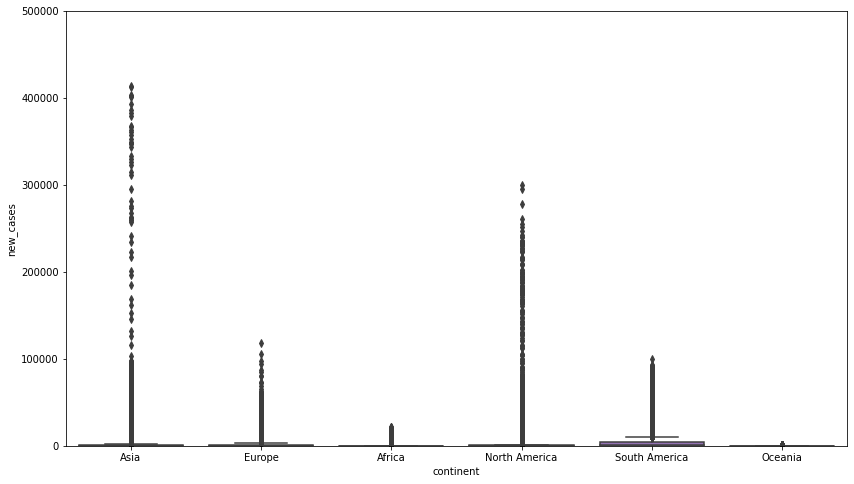

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

var = 'continent'
data = pd.concat([df['new_cases'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_cases", data=data)
fig.axis(ymin=0, ymax=500000);

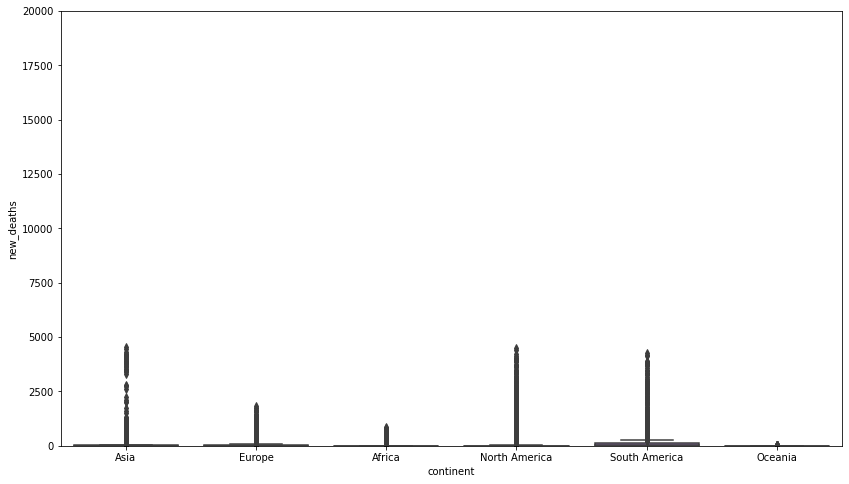

In [ ]:
var = 'continent'
data = pd.concat([df['new_deaths'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_deaths", data=data)
fig.axis(ymin=0, ymax=20000);

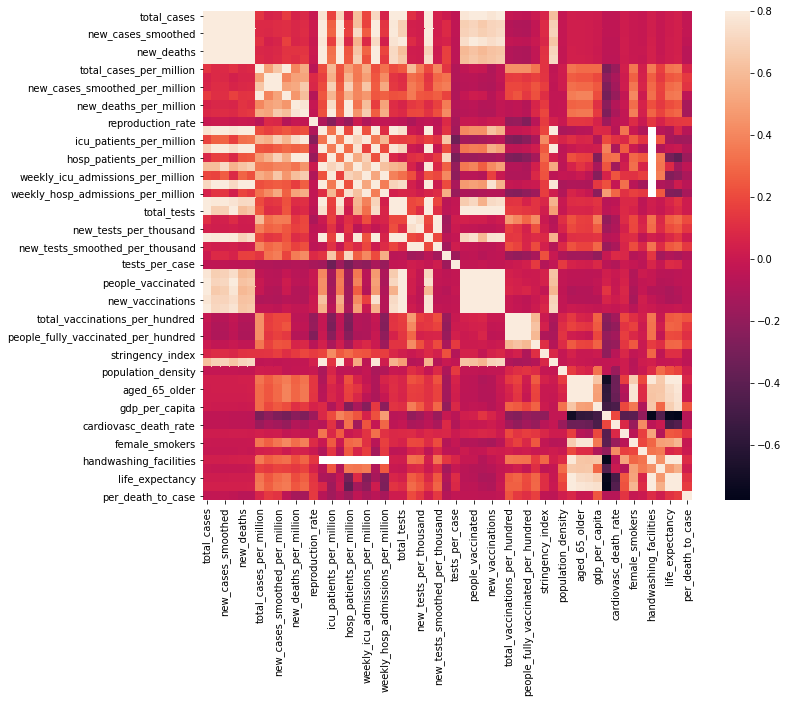

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Countries

In [ ]:
country = "Nepal"

include_nep = df[df['location'].values == country]
exclude_nep = df[df['location'].values != country]
nep_cov19 = include_nep
nep_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num,per_death_to_case
57257,NPL,Asia,Nepal,2020-01-25,1.0,1.0,NaN,NaN,NaN,NaN,0.034,0.034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,29136808.0,204.43,25.0,5.809,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.602,25012020,NaN
57258,NPL,Asia,Nepal,2020-01-26,1.0,0.0,NaN,NaN,NaN,NaN,0.034,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,29136808.0,204.43,25.0,5.809,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.602,26012020,NaN
57259,NPL,Asia,Nepal,2020-01-27,1.0,0.0,NaN,NaN,NaN,NaN,0.034,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,29136808.0,204.43,25.0,5.809,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.602,27012020,NaN
57260,NPL,Asia,Nepal,2020-01-28,1.0,0.0,NaN,NaN,NaN,NaN,0.034,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.000,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,29136808.0,204.43,25.0,5.809,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.602,28012020,NaN
57261,NPL,Asia,Nepal,2020-01-29,1.0,0.0,NaN,NaN,NaN,NaN,0.034,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,0.000,0.000,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,29136808.0,204.43,25.0,5.809,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.602,29012020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57738,NPL,Asia,Nepal,2021-05-20,488645.0,8227.0,8207.714,5847.0,190.0,197.286,16770.711,282.358,281.696,200.674,6.521,6.771,1.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21695.0,2855793.0,98.013,0.745,20462.0,0.702,0.401,2.5,tests performed,2596711.0,2113080.0,483631.0,NaN,13750.0,8.91,7.25,1.66,472.0,94.44,29136808.0,204.43,25.0,5.809,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.602,20052021,43.300000
57739,NPL,Asia,Nepal,2021-05-21,497052.0,8407.0,8199.143,6024.0,177.0,193.571,17059.247,288.535,281.402,206.749,6.075,6.644,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22353.0,2878146.0,98.780,0.767,20662.0,0.709,0.397,2.5,tests performed,2627333.0,2113080.0,514253.0,30622.0,17006.0,9.02,7.25,1.76,584.0,94.44,29136808.0,204.43,25.0,5.809,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.602,21052021,47.497175
57740,NPL,Asia,Nepal,2021-05-22,505643.0,8591.0,8277.000,6153.0,129.0,185.286,17354.097,294.850,284.074,211.176,4.427,6.359,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19357.0,2897503.0,

In [ ]:
country = "India"

include_i = df[df['location'].values == country]
exclude_i = df[df['location'].values != country]
i_cov19 = include_i
i_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,date_num,per_death_to_case
37634,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,30012020,NaN
37635,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,31012020,NaN
37636,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,01022020,NaN
37637,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,02022020,NaN
37638,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,03022020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38110,IND,Asia,India,2021-05-20,26031991.0,259551.0,283597.429,291331.0,4209.0,4144.857,18863.702,188.080,205.505,211.109,3.050,3.004,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2055010.0,322356187.0,233.591,1.489,1843943.0,1.336,0.154,6.5,samples tested,187886885.0,146624652.0,41262233.0,1476285.0,1360720.0,13.61,10.62,2.99,986.0,81.94,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,20052021,61.665716
38111,IND,Asia,India,2021-05-21,26289290.0,257299.0,273769.000,295525.0,4194.0,4188.286,19050.150,186.448,198.383,214.148,3.039,3.035,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2061683.0,324417870.0,235.085,1.494,1870539.0,1.355,0.146,6.8,samples tested,NaN,NaN,NaN,NaN,1388325.0,NaN,NaN,NaN,1006.0,81.94,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,21052021,61.349309
38112,IND,Asia,India,2021-05-22,26530132.0,240842.0,263722.143,299266.0,3741.0,4140.286,19224.672,174.523,191.102,216.859,2.711,3.000,0.86,NaN,NaN,NaN,NaN,NaN

Nepal

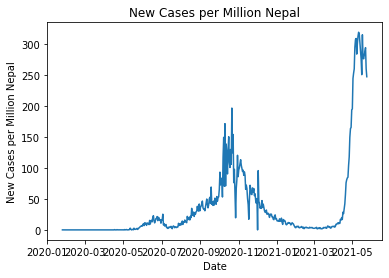

In [ ]:
plt.plot(nep_cov19.date, nep_cov19.new_cases_per_million)
plt.xlabel('Date')
plt.ylabel('New Cases per Million Nepal')
plt.title('New Cases per Million Nepal')
plt.show()

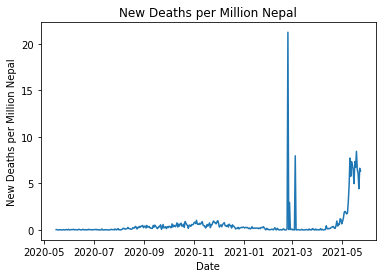

In [ ]:
plt.plot(nep_cov19.date, nep_cov19.new_deaths_per_million)
plt.xlabel('Date')
plt.ylabel('New Deaths per Million Nepal')
plt.title('New Deaths per Million Nepal')
plt.show()

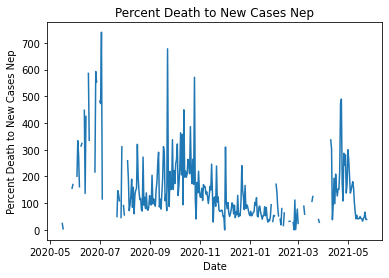

In [ ]:
plt.plot(nep_cov19.date, nep_cov19.per_death_to_case)
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases Nep')
plt.title('Percent Death to New Cases Nep')
plt.show()

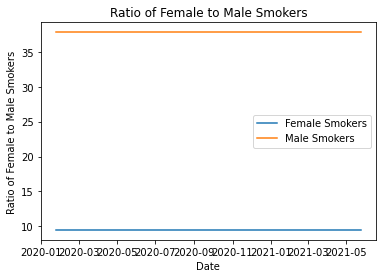

In [ ]:
plt.plot(nep_cov19.date, nep_cov19.female_smokers)
plt.plot(nep_cov19.date, nep_cov19.male_smokers)
plt.legend(['Female Smokers', 'Male Smokers'])
plt.xlabel('Date')
plt.ylabel('Ratio of Female to Male Smokers')
plt.title('Ratio of Female to Male Smokers')
plt.show()

India

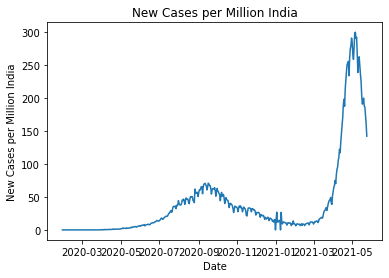

In [ ]:
plt.plot(i_cov19.date, i_cov19.new_cases_per_million)
plt.xlabel('Date')
plt.ylabel('New Cases per Million India')
plt.title('New Cases per Million India')
plt.show()

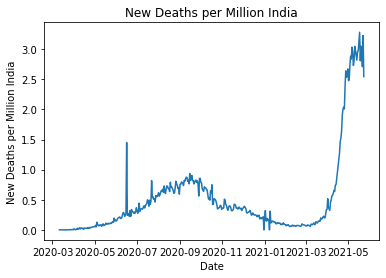

In [ ]:
plt.plot(i_cov19.date, i_cov19.new_deaths_per_million)
plt.xlabel('Date')
plt.ylabel('New Deaths per Million India')
plt.title('New Deaths per Million India')
plt.show()

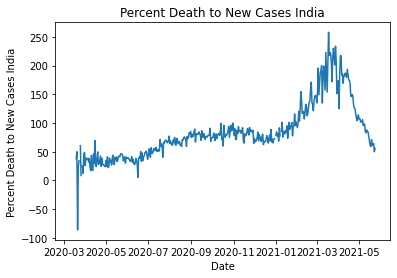

In [ ]:
plt.plot(i_cov19.date, i_cov19.per_death_to_case)
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases India')
plt.title('Percent Death to New Cases India')
plt.show()

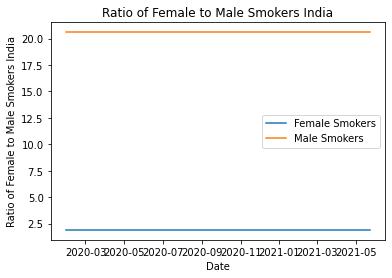

In [ ]:
plt.plot(i_cov19.date, i_cov19.female_smokers)
plt.plot(i_cov19.date, i_cov19.male_smokers)
plt.legend(['Female Smokers', 'Male Smokers'])
plt.xlabel('Date')
plt.ylabel('Ratio of Female to Male Smokers India')
plt.title('Ratio of Female to Male Smokers India')
plt.show()

Comparisons

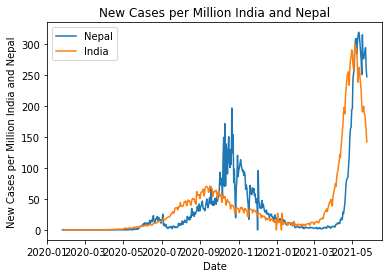

In [ ]:
plt.plot(nep_cov19.date, nep_cov19.new_cases_per_million)
plt.plot(i_cov19.date, i_cov19.new_cases_per_million)
plt.legend(['Nepal', 'India'])
plt.xlabel('Date')
plt.ylabel('New Cases per Million India and Nepal')
plt.title('New Cases per Million India and Nepal')
plt.show()

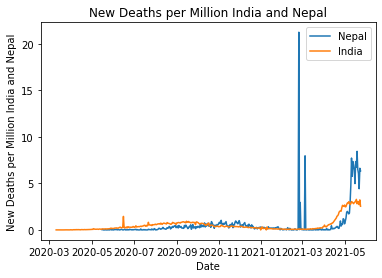

In [ ]:
plt.plot(nep_cov19.date, nep_cov19.new_deaths_per_million)
plt.plot(i_cov19.date, i_cov19.new_deaths_per_million)
plt.legend(['Nepal', 'India'])
plt.xlabel('Date')
plt.ylabel('New Deaths per Million India and Nepal')
plt.title('New Deaths per Million India and Nepal')
plt.show()

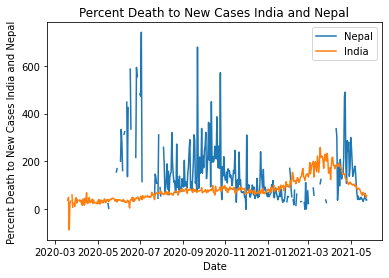

In [ ]:
plt.plot(nep_cov19.date, nep_cov19.per_death_to_case)
plt.plot(i_cov19.date, i_cov19.per_death_to_case)
plt.legend(['Nepal', 'India'])
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases India and Nepal')
plt.title('Percent Death to New Cases India and Nepal')
plt.show()

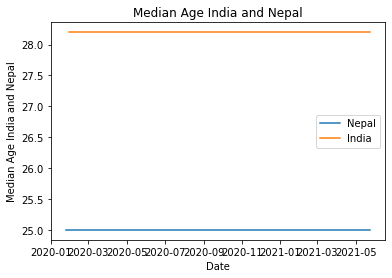

In [ ]:
plt.plot(nep_cov19.date, nep_cov19.median_age)
plt.plot(i_cov19.date, i_cov19.median_age)
plt.legend(['Nepal', 'India'])
plt.xlabel('Date')
plt.ylabel('Median Age India and Nepal')
plt.title('Median Age India and Nepal')
plt.show()

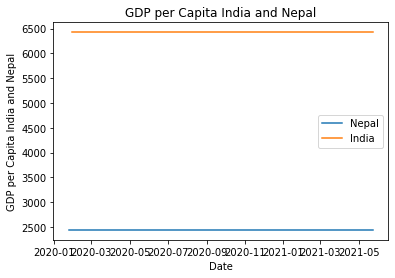

In [ ]:
plt.plot(nep_cov19.date, nep_cov19.gdp_per_capita)
plt.plot(i_cov19.date, i_cov19.gdp_per_capita)
plt.legend(['Nepal', 'India'])
plt.xlabel('Date')
plt.ylabel('GDP per Capita India and Nepal')
plt.title('GDP per Capita India and Nepal')
plt.show()

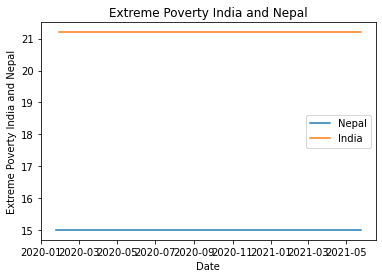

In [ ]:
plt.plot(nep_cov19.date, nep_cov19.extreme_poverty)
plt.plot(i_cov19.date, i_cov19.extreme_poverty)
plt.legend(['Nepal', 'India'])
plt.xlabel('Date')
plt.ylabel('Extreme Poverty India and Nepal')
plt.title('Extreme Poverty India and Nepal')
plt.show()

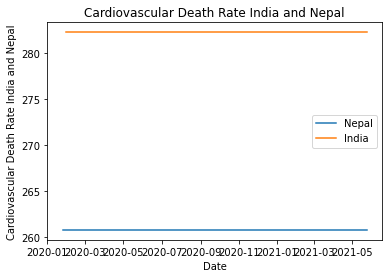

In [ ]:
plt.plot(nep_cov19.date, nep_cov19.cardiovasc_death_rate)
plt.plot(i_cov19.date, i_cov19.cardiovasc_death_rate)
plt.legend(['Nepal', 'India'])
plt.xlabel('Date')
plt.ylabel('Cardiovascular Death Rate India and Nepal')
plt.title('Cardiovascular Death Rate India and Nepal')
plt.show()

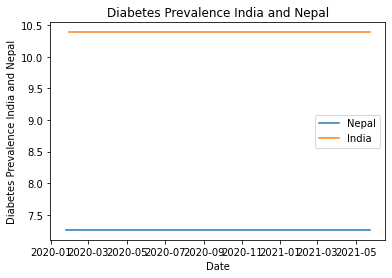

In [ ]:
plt.plot(nep_cov19.date, nep_cov19.diabetes_prevalence)
plt.plot(i_cov19.date, i_cov19.diabetes_prevalence)
plt.legend(['Nepal', 'India'])
plt.xlabel('Date')
plt.ylabel('Diabetes Prevalence India and Nepal')
plt.title('Diabetes Prevalence India and Nepal')
plt.show()

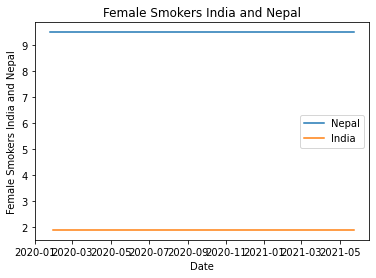

In [ ]:
plt.plot(nep_cov19.date, nep_cov19.female_smokers)
plt.plot(i_cov19.date, i_cov19.female_smokers)
plt.legend(['Nepal', 'India'])
plt.xlabel('Date')
plt.ylabel('Female Smokers India and Nepal')
plt.title('Female Smokers India and Nepal')
plt.show()

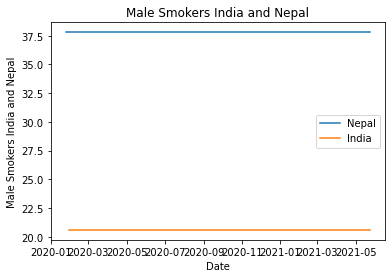

In [ ]:
plt.plot(nep_cov19.date, nep_cov19.male_smokers)
plt.plot(i_cov19.date, i_cov19.male_smokers)
plt.legend(['Nepal', 'India'])
plt.xlabel('Date')
plt.ylabel('Male Smokers India and Nepal')
plt.title('Male Smokers India and Nepal')
plt.show()

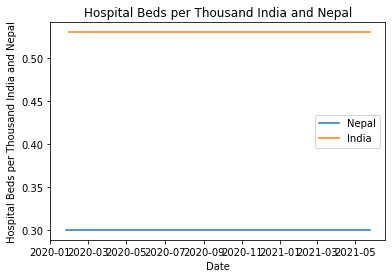

In [ ]:
plt.plot(nep_cov19.date, nep_cov19.hospital_beds_per_thousand)
plt.plot(i_cov19.date, i_cov19.hospital_beds_per_thousand)
plt.legend(['Nepal', 'India'])
plt.xlabel('Date')
plt.ylabel('Hospital Beds per Thousand India and Nepal')
plt.title('Hospital Beds per Thousand India and Nepal')
plt.show()

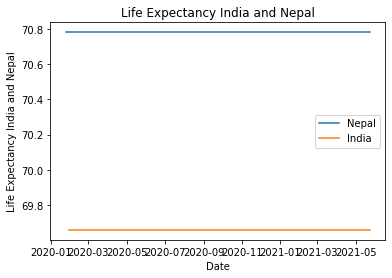

In [ ]:
plt.plot(nep_cov19.date, nep_cov19.life_expectancy)
plt.plot(i_cov19.date, i_cov19.life_expectancy)
plt.legend(['Nepal', 'India'])
plt.xlabel('Date')
plt.ylabel('Life Expectancy India and Nepal')
plt.title('Life Expectancy India and Nepal')
plt.show()

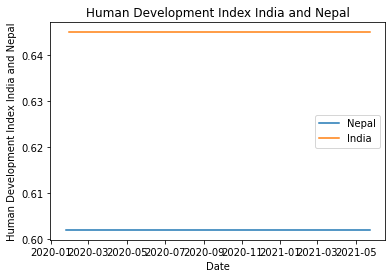

In [ ]:
plt.plot(nep_cov19.date, nep_cov19.human_development_index)
plt.plot(i_cov19.date, i_cov19.human_development_index)
plt.legend(['Nepal', 'India'])
plt.xlabel('Date')
plt.ylabel('Human Development Index India and Nepal')
plt.title('Human Development Index India and Nepal')
plt.show()